# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('new_data.csv')

In [4]:
data.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,0,153,246,0,17,04/03/2019,6000,8000,7000
1,0,153,246,10,30,04/03/2019,4500,5500,5000
2,0,153,246,18,39,04/03/2019,6000,8000,7000
3,0,153,246,19,148,04/03/2019,6000,8000,7000
4,0,153,246,22,148,04/03/2019,110000,130000,120000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   int64 
 1   district      2238 non-null   int64 
 2   market        2238 non-null   int64 
 3   commodity     2238 non-null   int64 
 4   variety       2238 non-null   int64 
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 157.5+ KB


In [6]:
# date to numerical format (ordinal encoding)
data["arrival_date"] = pd.to_datetime(data["arrival_date"], format="%d/%m/%Y").map(pd.Timestamp.toordinal)

In [7]:
data.describe()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.0,2238.000000,2238.000000,2238.000000
mean,16.008043,90.187668,156.571939,71.593834,122.973190,737122.0,2456.230563,2855.890527,2698.865952
std,7.016930,52.870204,90.208302,46.172636,48.497056,0.0,3452.497680,3917.251520,3694.830905
min,0.000000,0.000000,0.000000,0.000000,0.000000,737122.0,0.000000,0.000000,2.000000
25%,10.000000,44.000000,83.250000,27.000000,82.000000,737122.0,800.000000,1000.000000,950.000000
50%,18.000000,93.000000,153.000000,65.500000,148.000000,737122.0,1700.000000,1960.000000,1831.500000
75%,23.000000,140.000000,235.750000,117.000000,148.000000,737122.0,3200.000000,3700.000000,3500.000000
max,25.000000,173.000000,325.000000,155.000000,217.000000,737122.0,110000.000000,130000.000000,120000.000000


# EDA

In [8]:
prices = data[['min_price','max_price','modal_price']].corr()

<Axes: >

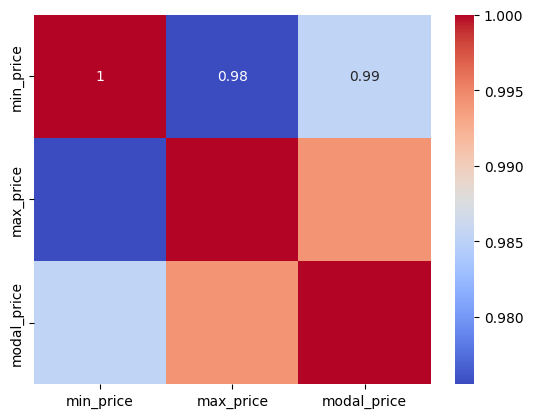

In [9]:
import seaborn as sns
sns.heatmap(prices,annot=True,cmap='coolwarm')

<Axes: >

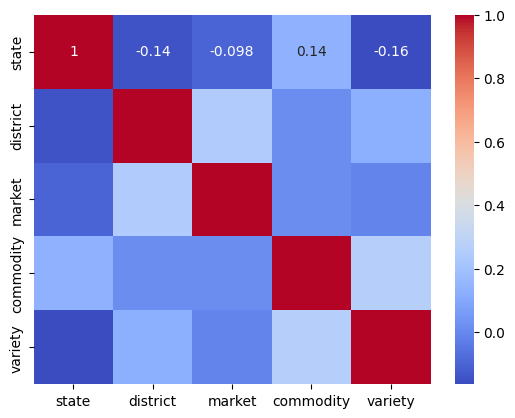

In [10]:
categorical_features = data[['state','district','market','commodity','variety']].corr()
sns.heatmap(categorical_features,annot=True,cmap='coolwarm')

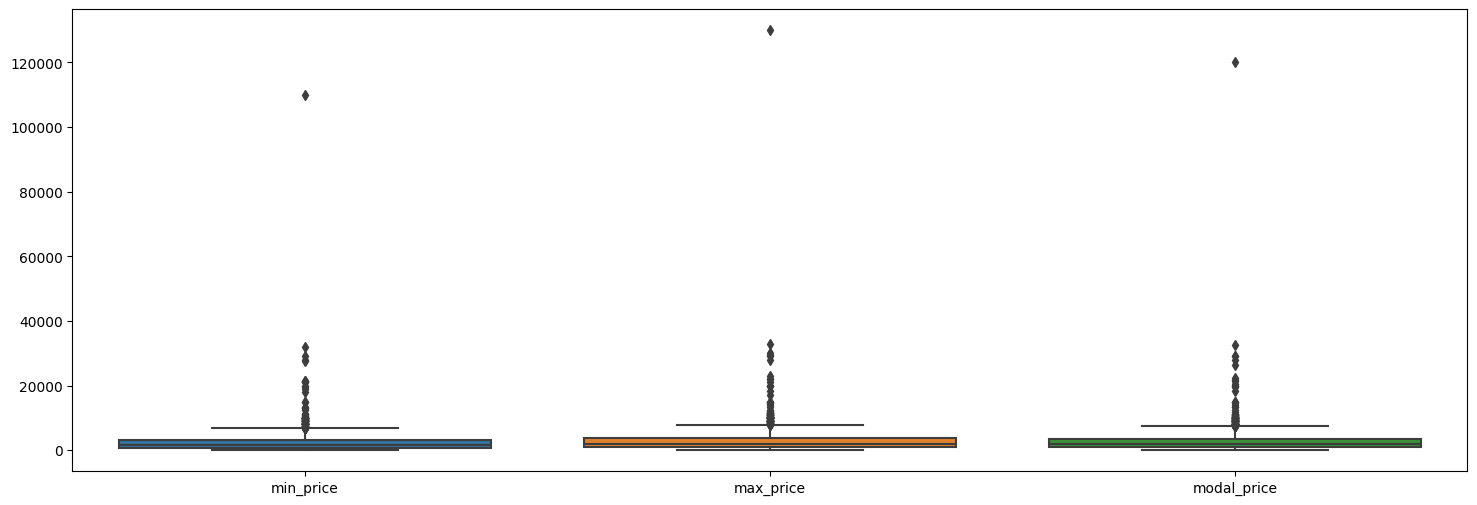

In [11]:
plt.figure(figsize=(18,6))
sns.boxplot(data=data[['min_price','max_price','modal_price']])
plt.show()

# ML - Analysis
- Linear Regression
- RandomForest
- KMeans
- PCA

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [13]:
from sklearn.model_selection import train_test_split
X = data.drop(['modal_price'],axis=1)
y = data['modal_price']

In [14]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [16]:
len(X_train),len(X_test)

(1790, 448)

In [17]:
len(y_train),len(y_test)

(1790, 448)

In [18]:
data.shape

(2238, 9)

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_preds = lr.predict(X_test)

In [21]:
print("mean squared error:",mean_squared_error(y_preds,y_test))
print("mean absolute error:",mean_absolute_error(y_test,y_preds))

mean squared error: 66344.6984200067
mean absolute error: 83.28374381964554


# Random Forest

In [22]:
tree = RandomForestRegressor(n_estimators=100,random_state=42)
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

In [44]:
print("mean squared error:",mean_squared_error(tree_pred,y_test))
print("mean absolute error:",mean_absolute_error(tree_pred,y_test))
print("R-squared score:",r2_score(tree_pred,y_test))

mean squared error: 87569.2434698661
mean absolute error: 70.3914955357143
R-squared score: 0.9877258260920639


# UnSupervised Learning

## K-Means Clustring

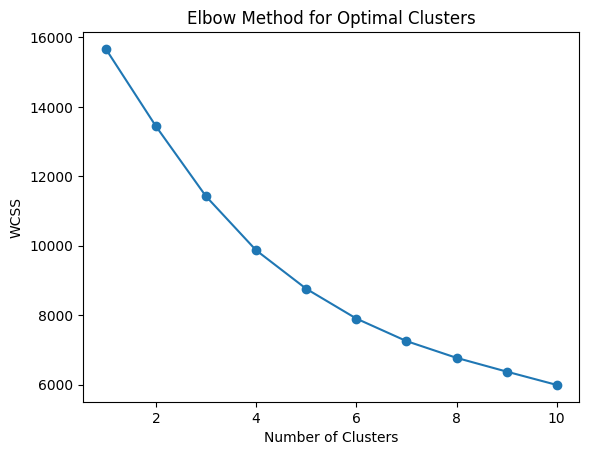

0    1200
1    1037
2       1
Name: Cluster, dtype: int64


In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply K-Means with optimal clusters (assuming 3 for now, can be changed)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster counts
print(data['Cluster'].value_counts())

In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
data

C:\Users\Yaswanth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,Cluster
0,0,153,246,0,17,737122,6000,8000,7000,0
1,0,153,246,10,30,737122,4500,5500,5000,0
2,0,153,246,18,39,737122,6000,8000,7000,0
3,0,153,246,19,148,737122,6000,8000,7000,0
4,0,153,246,22,148,737122,110000,130000,120000,2
...,...,...,...,...,...,...,...,...,...,...
2233,25,167,116,118,113,737122,530,570,550,0
2234,25,167,116,123,148,737122,3550,3650,3600,0
2235,25,167,255,74,202,737122,4400,4600,4500,0
2236,25,167,255,123,148,737122,3450,3550,3500,0


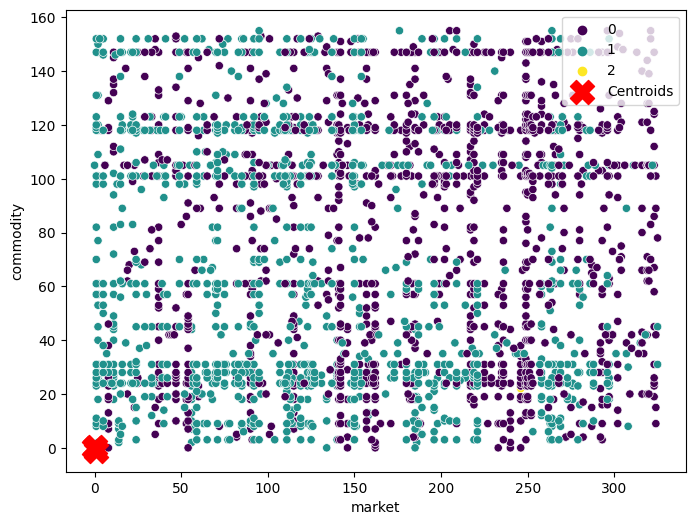

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.iloc[:, 2], y=data.iloc[:, 3], hue=data['Cluster'], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            s=300, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

# PCA

In [38]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [39]:
print('Explained Varience Ratio:',pca.explained_variance_)

Explained Varience Ratio: [2.08707711 1.38513646 1.17283145]


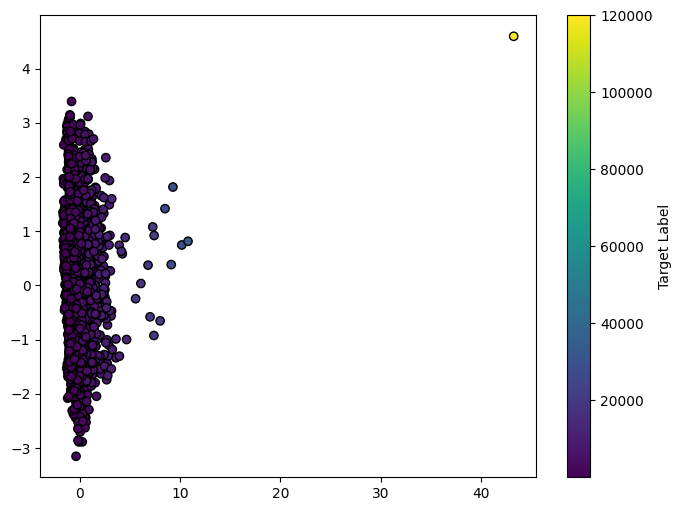

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.modal_price, cmap='viridis', edgecolor='k')
plt.colorbar(label='Target Label')
plt.show()

In [41]:
X_pca

array([[ 2.56957134,  0.1718111 , -2.89246787],
       [ 1.82084706, -0.1556191 , -2.82946542],
       [ 2.5044349 , -0.21394697, -2.44888363],
       ...,
       [ 0.73967771, -1.58174046,  0.33278536],
       [ 0.13771288, -1.42466917,  0.26941168],
       [-0.5116932 , -1.36395689,  0.14160991]])